In [2]:
# these packages are used in our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
import geopy.distance as geo
import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor
%matplotlib inline

# Considering Grade as an Additional Factor

In our final model, we unfortunately could not utilize grade due to its high multicollinearity with sqft_living. 
We still believe that grade is a major factor in the price of a home, and while the livable area of a home may contribute to its grade, it is more to do with the quality of the materials and craftsmanship. It is also reasonable to assume someone may want to spend more on higher grade home than on more square feet.

For this section we began by defining a new DataFrame,`df_grade`, in order to preserve previous and future work.

In [3]:
df_grade = pd.read_csv("data/master_data_2.csv")
df_grade


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,closest_water,group_C,group_E,group_N,group_NE,group_NW,group_S,group_SE,group_SW,group_W
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,...,0.680220,0,0,0,0,0,0,0,0,1
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,...,2.915718,0,0,0,0,1,0,0,0,0
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,...,2.331581,0,0,0,0,1,0,0,0,0
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,NO,...,0.466960,0,0,0,0,0,0,0,0,1
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,...,1.729957,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21054,21415,263000018,5/21/2014,360000,3,2.50,1530,1131,3.0,NO,...,5.356536,0,0,0,0,1,0,0,0,0
21055,21416,6600060120,2/23/2015,400000,4,2.50,2310,5813,2.0,NO,...,1.725096,0,0,0,0,0,0,0,0,1
21056,21417,1523300141,6/23/2014,402101,2,0.75,1020,1350,2.0,NO,...,0.926910,0,0,0,0,1,0,0,0,0
21057,21418,291310100,1/16/2015,400000,3,2.50,1600,2388,2.0,NaN,...,2.400465,1,0,0,0,0,0,0,0,0


We then saved the `price`, `grade`, and `sqft_living` columns as their own DataFrame, `grade_redux`, for future data manipulation.

In [4]:
grade_redux = df_grade[["price","grade","sqft_living"]]

We decided to run a statmodel ols linear regression test. Like all our other linear regressions, we split it into a 80% train and 20% test data. These were all had a `_g` added to their variables as to not affect other testing in the notebook with this simplified regression model.

In [5]:
y_g = grade_redux.price
X_g = grade_redux.drop('price', axis=1) 

X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_g, 
                                                    y_g,
                                                    test_size=0.2,
                                                    random_state=33)

We luckily since we only have one variable we are examining, there is no need for us to standard scale. So we move on to fitting our training data to our model using statmodels's ols feature

In [6]:
train_g_final = pd.concat((X_train_g,y_train_g),axis=1)

formula = 'price ~ grade'
model_grade_train = ols(formula=formula, data=train_g_final)
results = model_grade_train.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.357e+04
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:13:47   Log-Likelihood:            -2.3465e+05
No. Observations:               16847   AIC:                         4.693e+05
Df Residuals:                   16845   BIC:                         4.693e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.39e+04    -76.391      0.000   -1.09e+06   -1.03e+06
grade        2.09e+05   1793.842    116.485      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    13508.847   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689235.834
Skew:                           3.471   Prob(JB):                         0.00
Kurtosis:                      33.556   Cond. No.                         52.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The above states that our simple model that includes the grade as our only inferential perameter predicts 44.6% of the variation in home prices in our training data. Our coefficent tells us that for every change in one numeric grade, we see, on average, a jump in home price of $210,000.

Next we wanted to see our median price, median sqft_living, and median price per sqft_living for each group. This was accomplished by grouping `price` and `sqft_living` by grade in a new DataFrame. We then added a new value which calculated price per square foot. We used median to eliminate any outliers that were skewing our data.

In [7]:
med_price_by_grade = grade_redux.groupby(['grade']).median(['price','sqft_living'])
ind = med_price_by_grade.index
med_price_by_grade["price_per_sqft_liv"] = med_price_by_grade['price']/med_price_by_grade['sqft_living']

med_price_by_grade


,price,sqft_living,price_per_sqft_liv
grade,,,
3,262000.0,520.0,503.846154
4,200000.0,700.0,285.714286
5,226225.0,900.0,251.361111
6,275000.0,1120.0,245.535714
7,375000.0,1630.0,230.061350
8,510000.0,2150.0,237.209302
9,723000.0,2811.0,257.203842
10,916000.0,3450.0,265.507246
11,1280000.0,4227.5,302.779420


We then graphed both of these results below.

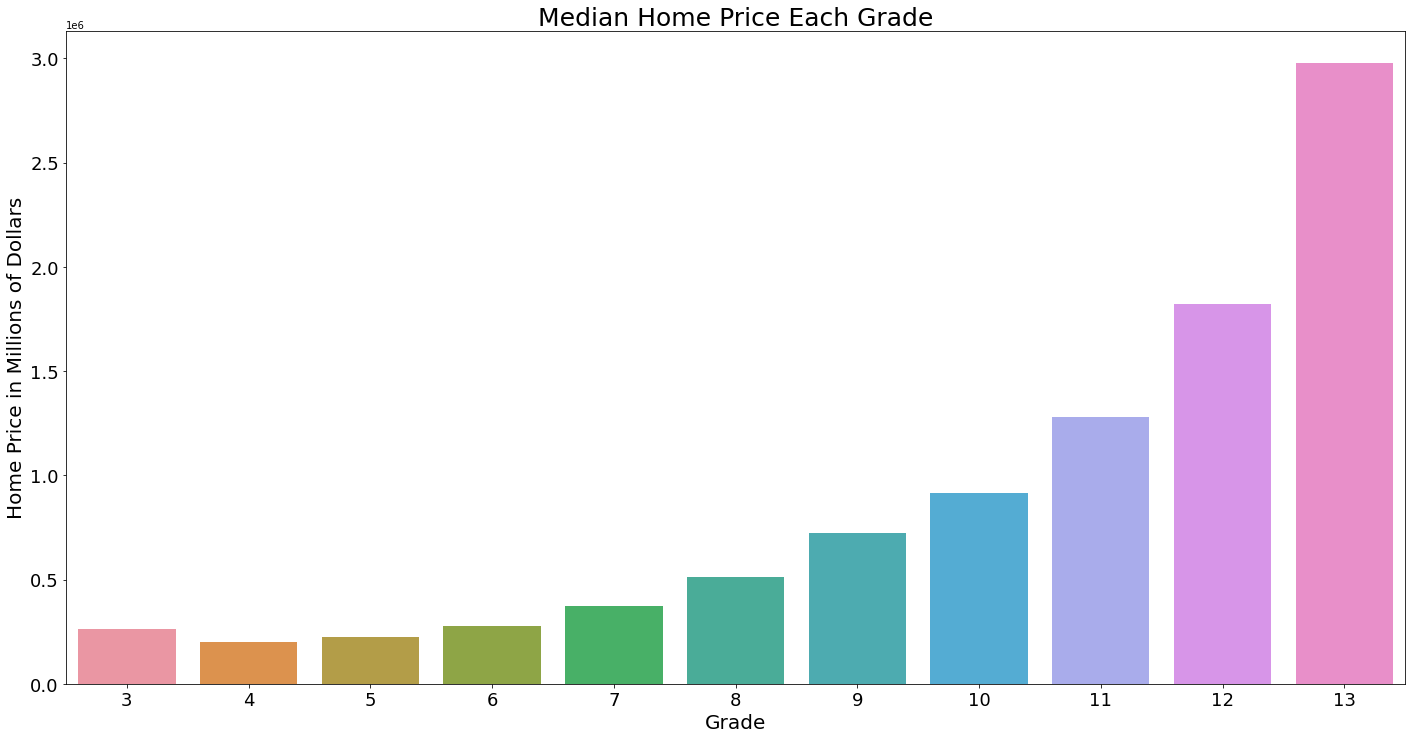

In [8]:
plt.figure (figsize=(24,12))
ax = sns.barplot(x = ind,  y = med_price_by_grade["price"])

ax.set_xlabel("Grade", fontsize = 20)
ax.set_ylabel("Home Price in Millions of Dollars", fontsize = 20)
ax.set_title("Median Home Price Each Grade", fontsize = 25)

plt.tick_params(axis='both', which='major', labelsize=18)


#### Now that we see this visually, we consider if this makes sense. 
At first, the grade 3's appear to have a median price higher than the grade 4's and 5's! However, if we do a quick value count of grades,


In [9]:
df_grade.grade.value_counts()

7     8779
8     5965
9     2527
6     1967
10    1096
11     378
5      226
12      80
4       27
13      13
3        1
Name: grade, dtype: int64

### We see that there is only a single grade 3 home in our data! 
We will consider the single grade 3 home an unusually highly priced home (most likely an outlier if we had more grade 3 homes to compare it to) and move on. 

Moving on to grade 4, we can visually see that the lowest grade homes have the lowest median home price and the highest grade, grade 13, have the highest price. This makes sense. Next we will further examine the price per sqft for each grade.

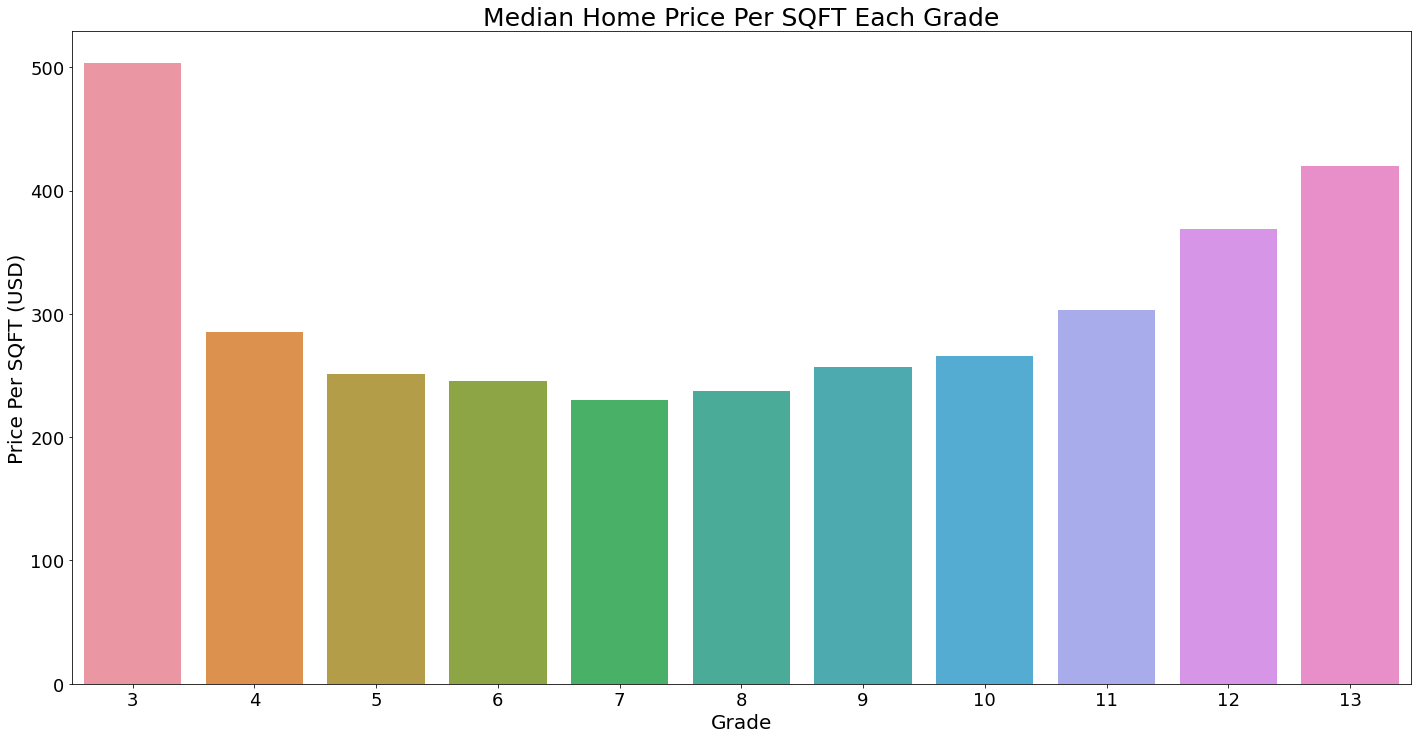

In [11]:
plt.figure (figsize=(24,12))
ax = sns.barplot(x = ind,  y = med_price_by_grade["price_per_sqft_liv"])
ax.set_xlabel("Grade", fontsize = 20)
ax.set_ylabel("Price Per SQFT (USD)", fontsize = 20)
ax.set_title("Median Home Price Per SQFT Each Grade", fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=18)


#### At first glance this again may not make sense! 
How can the lowest grade in our model have the absolute highest median price square foot?!
We recall that we considered our single grade 3 home a probable outlier, skewing our data. 

But even if that is true, our price seems to decrease from grades 4 to to 7 before going back up as we would expect! Perhaps something is "diluting" the price per square foot? We looked at our 'med_price_by_grade' dataframe to see what was going on. 

In [12]:
med_price_by_grade

,price,sqft_living,price_per_sqft_liv
grade,,,
3,262000.0,520.0,503.846154
4,200000.0,700.0,285.714286
5,226225.0,900.0,251.361111
6,275000.0,1120.0,245.535714
7,375000.0,1630.0,230.061350
8,510000.0,2150.0,237.209302
9,723000.0,2811.0,257.203842
10,916000.0,3450.0,265.507246
11,1280000.0,4227.5,302.779420


It can be seen that because our sqft_living value is continually increasing, this causes our "dilution" of price per sqft value. Jumping from grade 4 to 5, our sqft_living increases by 28.5%, while their respective prices are only a 13.1% change. Any time our price change percentage is beaten by our sqft_living percentage, we have "diluted" our value per sqft of our homes. 

Looking at the change from grade 10 to 11 we have a 22% increase in living space and a 39.7% change in price, registering as a positive change on our graph.


We then created a new category that is the percent change between each grade. As we had no grade 1 or 2 houses, we could not get the difference in price between them or for our grade 3 homes. We also must throw out the grade 4 result as our probable outlier grade 3 has skewed it . These results were then graphed as both a bar and line graph. 

In [13]:
med_price_by_grade["percent_change_by_grade"] = med_price_by_grade["price_per_sqft_liv"].pct_change() * 100

    

In [27]:
med_price_by_grade

,price,sqft_living,price_per_sqft_liv,percent_change_by_grade
grade,,,,
3,262000.0,520.0,503.846154,NaN
4,200000.0,700.0,285.714286,-43.293348
5,226225.0,900.0,251.361111,-12.023611
6,275000.0,1120.0,245.535714,-2.317541
7,375000.0,1630.0,230.061350,-6.302287
8,510000.0,2150.0,237.209302,3.106977
9,723000.0,2811.0,257.203842,8.429071
10,916000.0,3450.0,265.507246,3.228336
11,1280000.0,4227.5,302.779420,14.038101


We can see that our grade 3 has no result for percent change and our grade 4 has been massively skewed and should be ignored unless we obtain more data in the future. We then graphed our remaining results to visually interpret them.

In [82]:
label_col = med_price_by_grade
label_col["label"] = label_col.index.map(lambda x: f'{x-1} to {x}')
label_5 = np.array(label_col.label[2:])


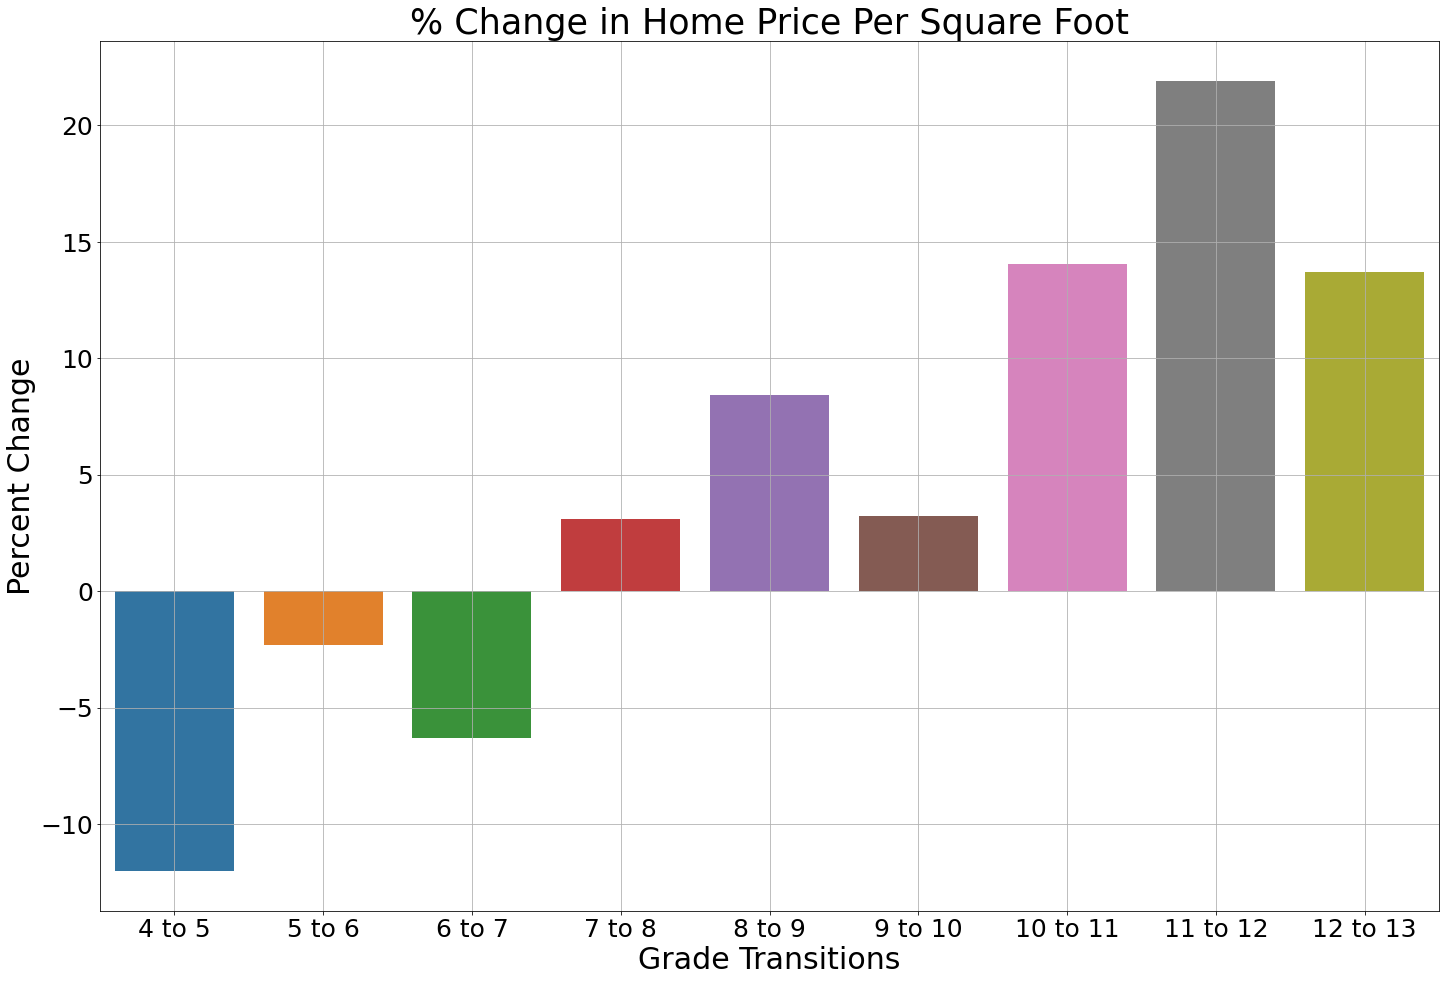

In [92]:
plt.figure (figsize=(24,16))
ax = sns.barplot(x=label_5, y = med_price_by_grade.percent_change_by_grade[2:])
ax.set_xlabel("Grade Transitions", fontsize = 30)
ax.set_ylabel("Percent Change", fontsize = 30)
ax.set_title("% Change in Home Price Per Square Foot", fontsize = 35)
plt.tick_params(axis='both', which='major', labelsize=25);
plt.grid()  


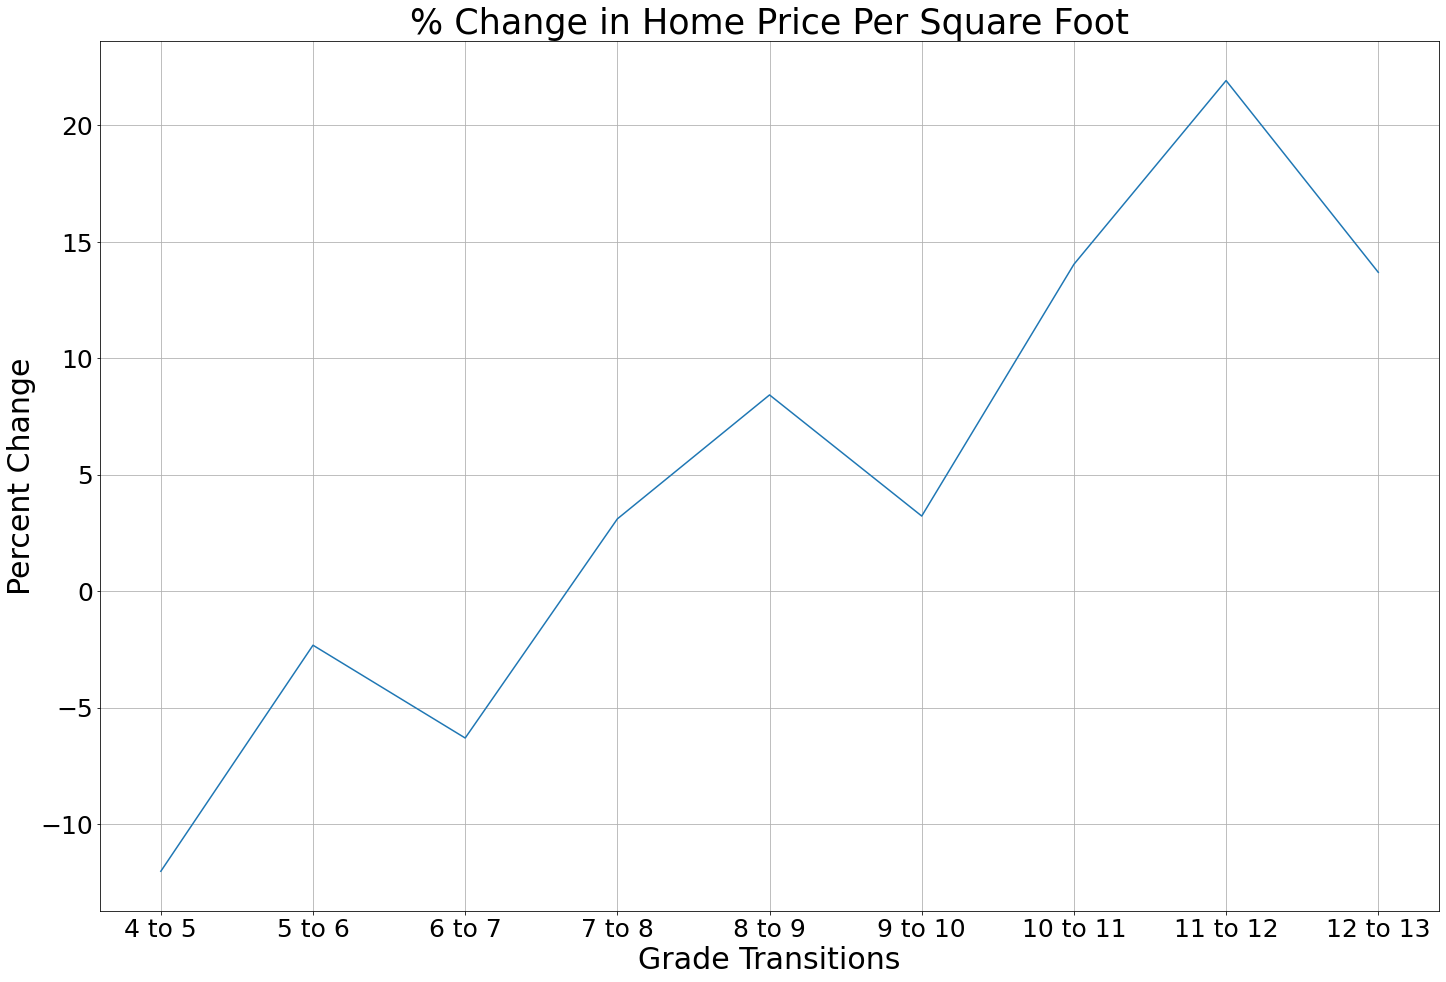

In [89]:
plt.figure (figsize=(24,16))
ax = sns.lineplot(x=label_5, y = med_price_by_grade.percent_change_by_grade[2:])
ax.set_xlabel("Grade Transitions", fontsize = 30)
ax.set_ylabel("Percent Change", fontsize = 30)
ax.set_title("% Change in Home Price Per Square Foot", fontsize = 35)
plt.tick_params(axis='both', which='major', labelsize=25);
plt.grid()  


As you can see, it would be best practice to begin with a grade 7 or lower house, then during a flip, rennovate the home until it is a grade 8 or higher as there are massive possible profit gains.
